# Email Spam Detection using Naive Bayes

## Project Objective

Build a classification model that can accurately detect whether an email is spam or ham (not spam) using Naive Bayes algorithms. This is vital for preventing phishing, filtering malicious content, and enhancing productivity.

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud

## Data Loading

In [2]:
df = pd.read_csv(r"C:\Users\CSC 2020\Downloads\spam.csv", encoding = 'latin1')[['v1', 'v2']]

## Exploration & Cleaning

In [3]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Renaming Columns
df.columns= ['Target', 'Text']

In [5]:
df.shape

(5572, 2)

In [6]:
df.isna().sum()

Target    0
Text      0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(403)

In [8]:
# Dropping Duplicates
print(f"Data shape before: {df.shape}")
df = df.drop_duplicates(keep = 'first')
print(f"Data shape after: {df.shape}")

Data shape before: (5572, 2)
Data shape after: (5169, 2)


In [9]:
# Defining text cleaning function
def clean_text(msg):
    msg = msg.lower() # Converts text to lowercase
    msg = ''.join([char for char in msg if char not in string.punctuation]) #  Removes all punctuation
    return msg

# Applying text cleaning
df['Text'] = df['Text'].apply(clean_text)

In [10]:
df.describe()

,Target,Text
count,5169,5169
unique,2,5142
top,ham,ok
freq,4516,4


## Class Distribution – Balance Check

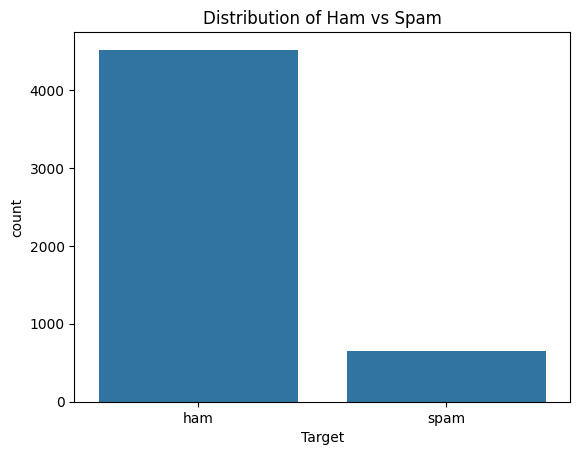

Class Balance:
Target
ham     0.87367
spam    0.12633
Name: proportion, dtype: float64


In [11]:
# Visualizing class distribution
sns.countplot(data=df, x='Target')
plt.title("Distribution of Ham vs Spam")
plt.show()

# Displaying class ratio
print("Class Balance:")
print(df['Target'].value_counts(normalize=True))

##  Word Clouds for Ham and Spam

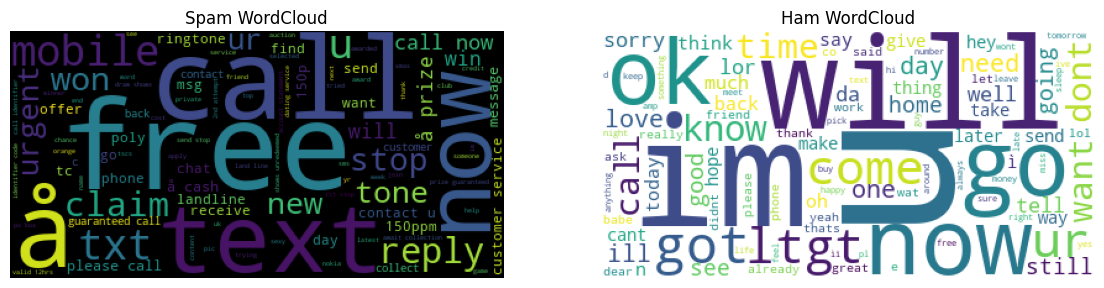

In [15]:
# Creating word clouds for spam and ham messages
spam_words = ' '.join(df[df['Target'] == 'spam']['Text'])
ham_words = ' '.join(df[df['Target'] == 'ham']['Text'])
plt.figure(figsize=(14,18))
plt.subplot(1,2,1)
plt.title("Spam WordCloud")
plt.imshow(WordCloud(background_color='black', max_words=100).generate(spam_words))
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Ham WordCloud")
plt.imshow(WordCloud(background_color='white', max_words=100).generate(ham_words))
plt.axis('off')
plt.show()

## Vectorization (Bag of Words or TF-IDF)

In [13]:
# Extracting features using Bag of Words
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Text'])
y = df['Target']

Term Frequency–Inverse Document Frequency improves feature quality by downweighting common words and emphasizing distinctive ones (e.g., “free”, “offer”), which helps reduce false positives and boost precision.

##  Model Training and Evaluation: Multinomial Naive Bayes

Multinomial Naive Bayes Classification Report:

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       903
        spam       1.00      0.71      0.83       131

    accuracy                           0.96      1034
   macro avg       0.98      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034



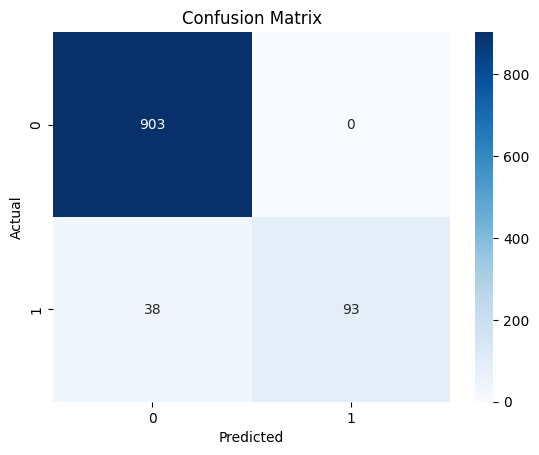

In [14]:
# Encoding labels: spam = 1, ham = 0
df['label_encoded'] = LabelEncoder().fit_transform(df['Target'])

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Training Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

# Evaluating Multinomial Naive Bayes model
print("Multinomial Naive Bayes Classification Report:\n")
print(classification_report(y_test, y_pred_mnb))

# Plotting confusion matrix for MultinomialNB
sns.heatmap(confusion_matrix(y_test, y_pred_mnb), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Conclusion

In the context of spam detection, precision is especially important because we want to avoid falsely flagging genuine (ham) messages as spam. While the dataset was moderately imbalanced; 87% ham and 13% spam, the Multinomial Naive Bayes model performed strongly with TF-IDF vectorization, achieving 100% precision and 71% recall for spam. This means that although some spam messages were missed, every message it did classify as spam was actually spam. This trade off favors caution, making the model a reliable choice in scenarios where avoiding false positives is more critical than catching every spam message.